## Iris 데이터를 활용한 실습

### 필수 라이브러리 불러오기

In [1]:
import numpy as np # 선형대수학 : Labelled Histogram 사용때 중요. 
import pandas as pd # 데이터 전처리, CSV 파일 불러오기

import os
print(os.listdir("./data"))

['welfare_python.csv', '주요발생국가주간동향(4월2째주).csv', 'human_info.csv', 'spotify.csv', 'crime_in_Seoul_include_gu_name.csv', 'use_log.csv', 'tips.csv', 'welfare_job.csv', 'campaign_master.csv', 'NanumGothic.ttf', 'class_master.csv', 'insurance.csv', 'welfareClean.csv', 'UNdata.csv', 'CCTV_result.csv', 'human_height.csv', 'flight_delays.csv', 'diamonds.csv', 'customer_newer.csv', 'Iris.csv', 'customer_master.csv', 'skorea_municipalities_geo_simple.json', 'customer_join.csv', 'fifa.csv', 'mpg.csv']


**Pandas 와 Seaborn 모듈 임포팅**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore') 

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Iris 데이터셋 불러오기**

In [3]:
iris=pd.read_csv('./data/Iris.csv')

**Data 보기**

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.drop('Id',axis=1,inplace=True) # index 번호와 동일함으로 삭제

**결측치 확인**

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

- 이 데이터 세트에는 세 가지 종류의 아이리스 식물이 있음.

**1. 데이터 설명**

Text(0.5, 1.0, 'General Statistics of Iris Dataset')

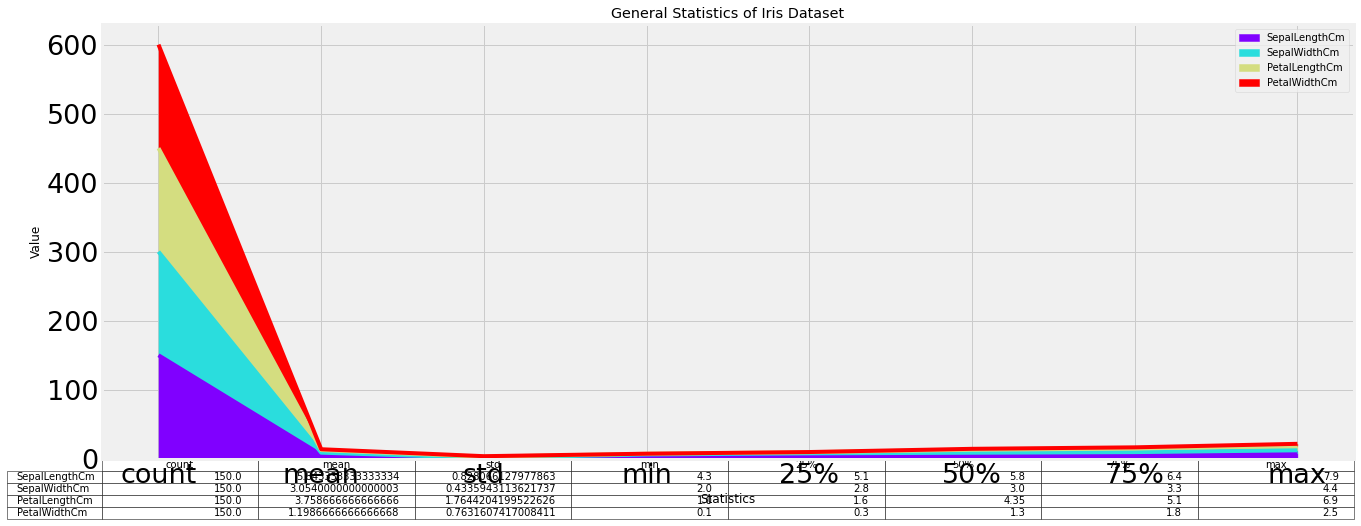

In [8]:
iris.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Iris Dataset")

- 위의 플롯은 데이터셋에 대한 일반적인 아이디어를 제공.
- 데이터 셋의 통계치 제공 : count, mean, std, min

**2.Bar Plot :**

- 여기에 관측 빈도가 표시됨.
- 이 경우, Iris Dataset에 있는 세 종의 빈도를 표시하고 있음.

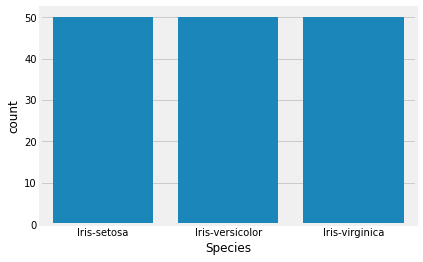

In [9]:
sns.countplot(x='Species',data=iris)
plt.show()

**3. Pie Chart :**


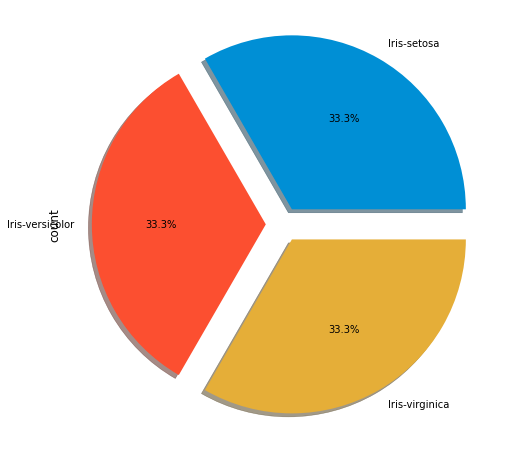

In [10]:
iris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

- 이 데이터 세트에는 모든 Iris 종류(3종류)에 대하여 50개의 데이터가 있음을 확인.

**4. Joint plot:**

- 조인트 플롯은 Seaborn 라이브러리에 한정. 
- 두 변수 사이의 관계를 신속하게 시각화 및 분석하고 동일한 플롯에서 개별 분포를 설명하는 데 사용할 수 있음.

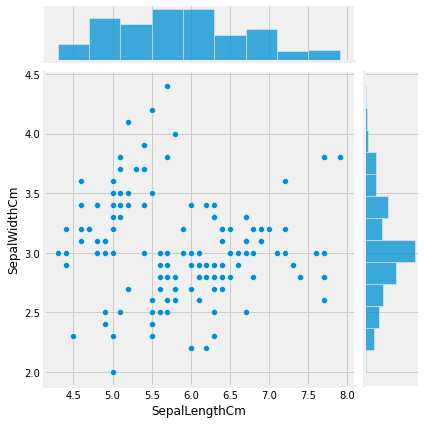

In [11]:
fig=sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=iris)

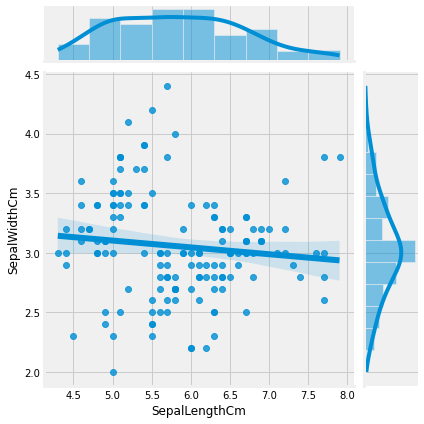

In [12]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, kind="reg")
pass

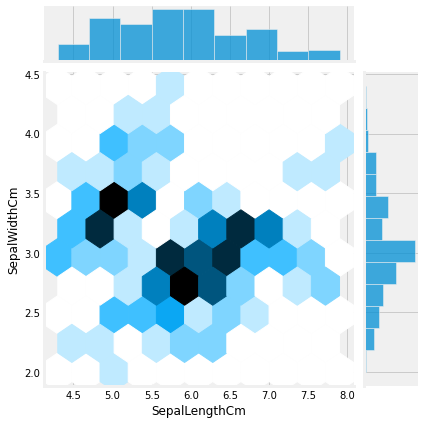

In [13]:
fig=sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',kind='hex',data=iris)

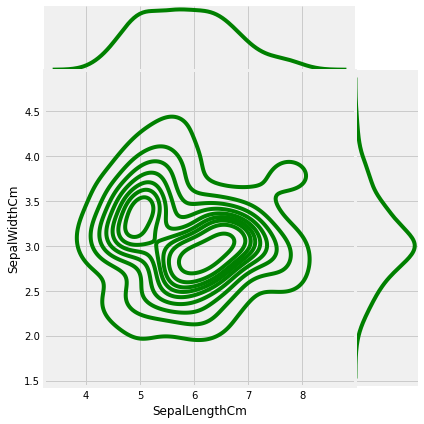

In [14]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, kind="kde",space=0,color='g')
pass

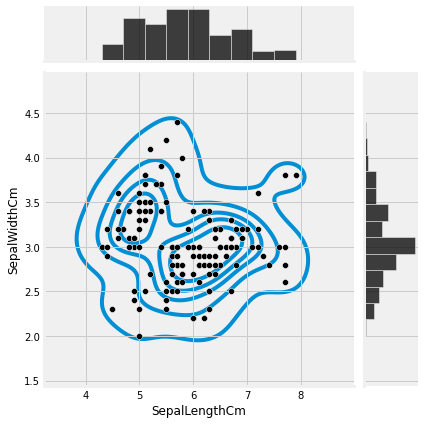

In [15]:
g = (sns.jointplot(x="SepalLengthCm", y="SepalWidthCm",data=iris, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))

**5. FacetGrid Plot :**

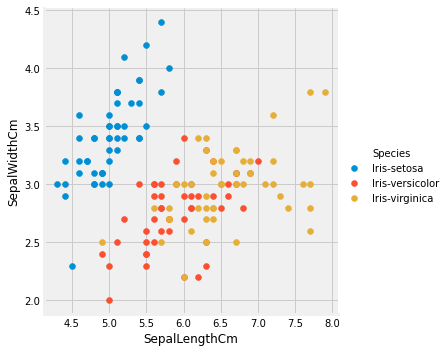

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.FacetGrid(iris,hue='Species',height=5)\
    .map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
    .add_legend()
pass

**6. Boxplot or Whisker plot**

- Box Plot은 1969년 수학자 존 터키에 의해 처음 소개됨.
- Box Plot은 표시 중인 특성의 통계적 요약을 제공.
- 맨 위 선은 최대값을 나타내고, 상자의 위쪽 가장자리는 3 사분위수, 중간 가장자리는 중위수를 나타내며, 아래쪽 가장자리는 1 사분위수 값을 나타냄.맨 아래 선은 변수의 최소값을 나타냄.
- Box의 높이를 사분위간 범위라고 함.
- Plot의 검은 점은 데이터의 아웃라이어 값을 나타냄.

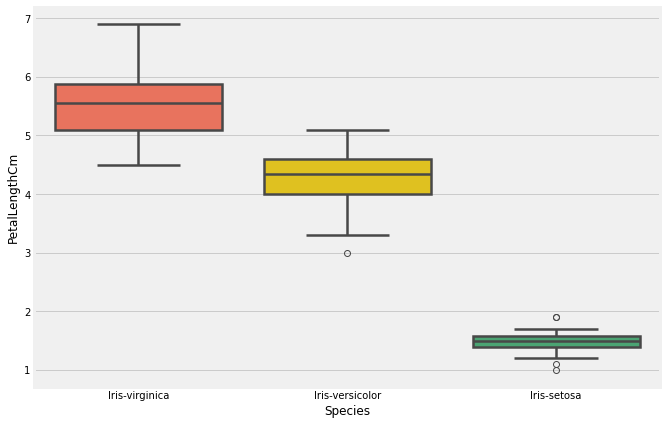

In [17]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Species',
                y='PetalLengthCm',
                data=iris,
                order=['Iris-virginica','Iris-versicolor','Iris-setosa'],
                linewidth=2.5,
                orient='v',
                dodge=False, 
                palette = {'Iris-virginica' : 'tomato', 'Iris-versicolor' : 'gold', 'Iris-setosa' : 'mediumseagreen'}
               )

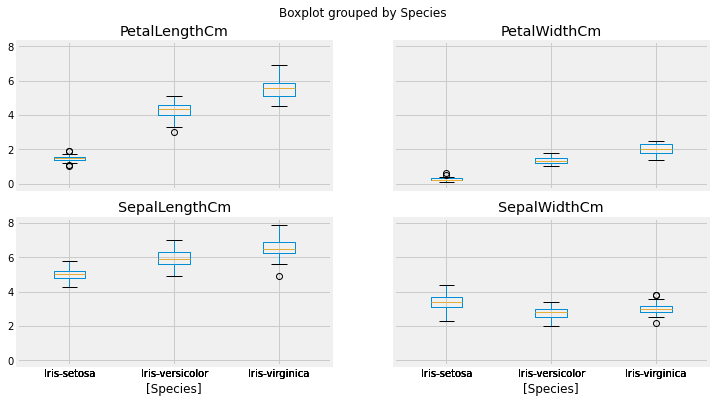

In [18]:
iris.boxplot(by="Species", figsize=(12, 6))
pass

**7. Strip plot**

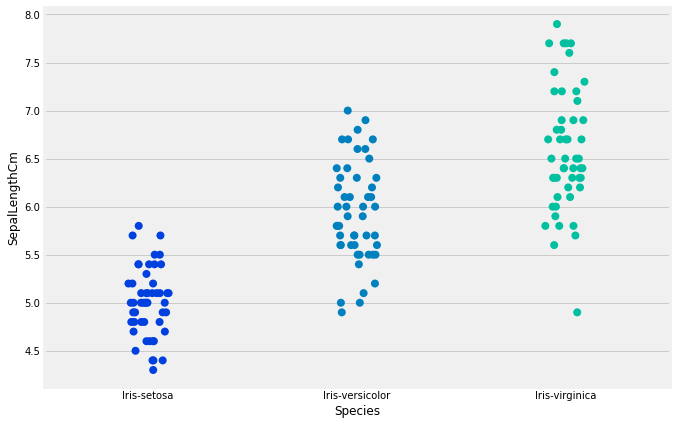

In [19]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.stripplot(x='Species',
                  y='SepalLengthCm',
                  data=iris,
                  jitter=True,
                  edgecolor='gray',
                  size=8,
                  palette='winter',
                  orient='v')

**8. Combining Box and Strip Plots**

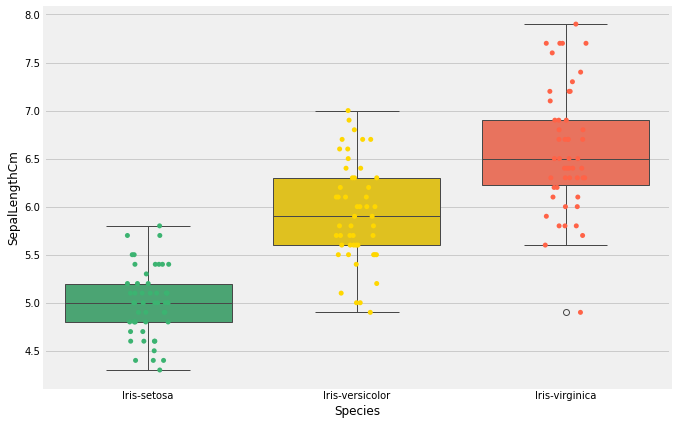

In [20]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Species',
                y='SepalLengthCm',
                data=iris, 
                palette = {'Iris-setosa': 'mediumseagreen','Iris-versicolor': 'gold', 'Iris-virginica': 'tomato'}
               )
fig=sns.stripplot(x='Species',
                  y='SepalLengthCm',
                  data=iris,
                  jitter=True,
                  edgecolor='gray',
                  palette = {'Iris-setosa': 'mediumseagreen','Iris-versicolor': 'gold', 'Iris-virginica': 'tomato'}
                 )

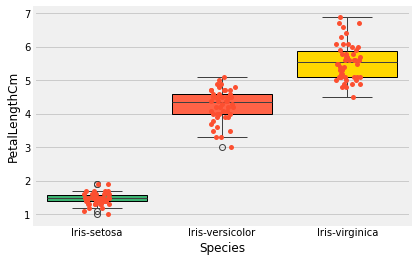

In [21]:
ax= sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax= sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

colors = ['mediumseagreen', 'tomato', 'gold']  

for patch, color in zip(ax.patches, colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')

plt.show()

**9. Violin Plot :**

- 데이터의 분포와 확률 분포를 시각화하는 데 사용됨.
- 이 Plot은 데이터의 분포 모양을 표시하기 위해 회전하여 양쪽에 배치하는 Box Plot과 Density Plot의 조합. 
- 중앙에 있는 두꺼운 검은색 막대는 사분위간 범위를 나타내고, 그것으로부터 연장된 얇은 검은색 선은 95% 신뢰 구간을 나타내며, 흰색 점은 중위수를 나타냄.
- Box Plot은 시각적 단순성으로 인해 데이터 값이 분포되는 방식에 대한 중요한 세부 정보를 숨기는 경향이 있으므로 데이터 표시에 제한이 있음.

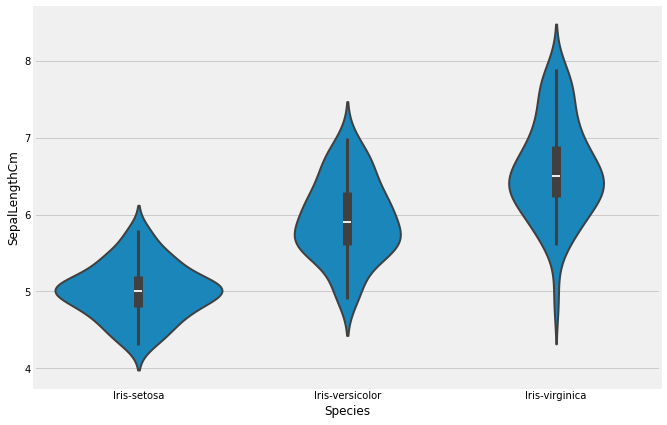

In [22]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.violinplot(x='Species',
                   y='SepalLengthCm',
                   data=iris, linewidth=2)

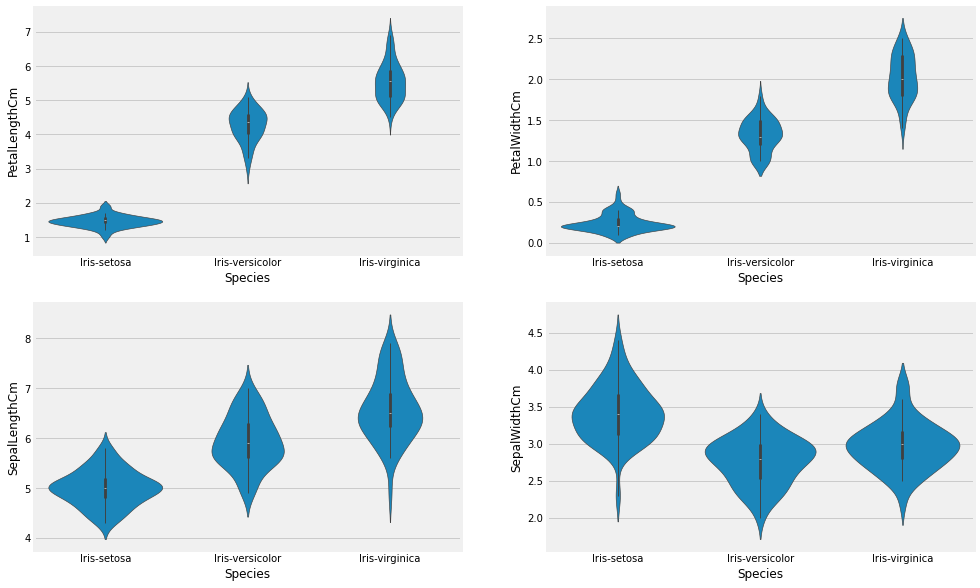

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)

sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)
pass

**10. Pair Plot:**

- Pair Plot은 산점도라고 함.
- 쌍 을 이룬 데이터로 작업 할 때 유용한 유형의 그래프.

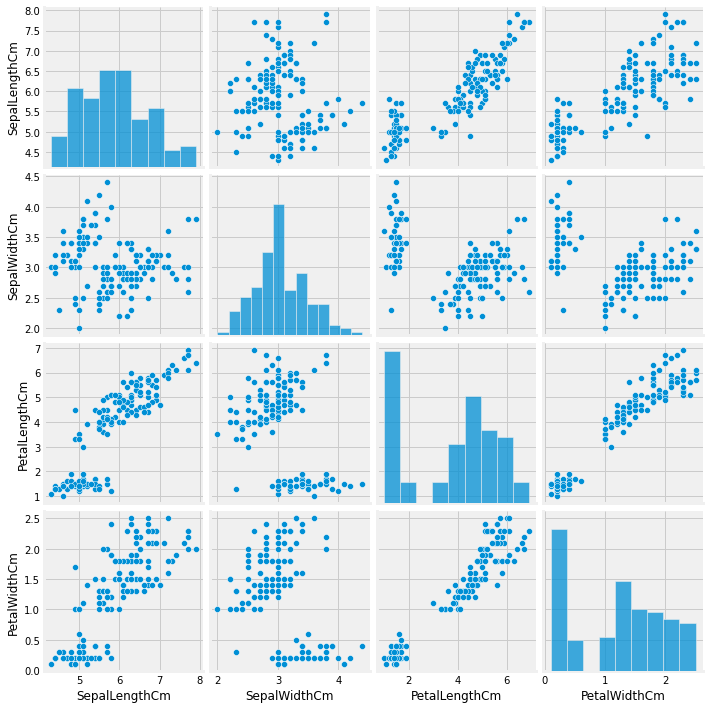

In [24]:
sns.pairplot(data=iris,kind='scatter')
pass

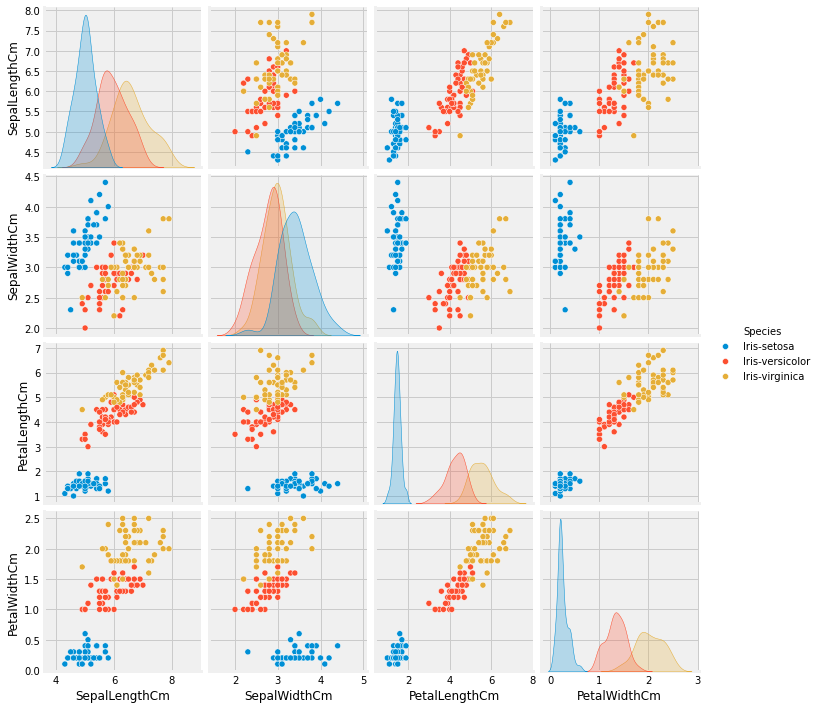

In [25]:
sns.pairplot(iris,hue='Species');

**11. Heat map**

- Heat Map 는 데이터 세트에서 서로 다른 변수 간의 상관 관계를 알아내는 데 사용됨.

- 양수 또는 음수 값이 높으면 변수의 상관 관계가 높음을 나타냄.

- 이를 통해 머신 러닝을 위한 파라미터를 선택할 수 있음.

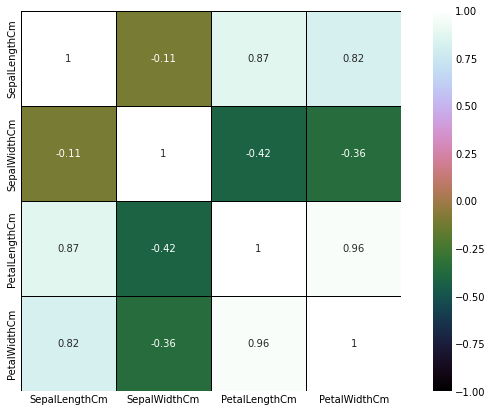

In [29]:
fig=plt.gcf()
fig.set_size_inches(10,7)

fig=sns.heatmap(iris.select_dtypes(include='number').corr(),
                annot=True,
                cmap='cubehelix',
                linewidths=1,
                linecolor='k',
                square=True,
                mask=False, 
                vmin=-1, 
                vmax=1,
                cbar_kws={"orientation": "vertical"},
                cbar=True
               )

**12. Distribution plot:**

- Distribution Plot는 숫자 데이터 그룹의 범위와 분포를 비교하는 데 적합함.

- 데이터는 축을 따라 값 포인트로 표시됨.

- 값의 분포를 보려면 값 포인트만 표시하도록 선택하거나, 값의 범위를 보려면 경계 상자 또는 두 값의 조합을 표시하도록 선택할 수 있음.

- Distribution Plot는 데이터 분포의 요약을 다루므로 데이터의 상세 분석에는 관련이 없음.

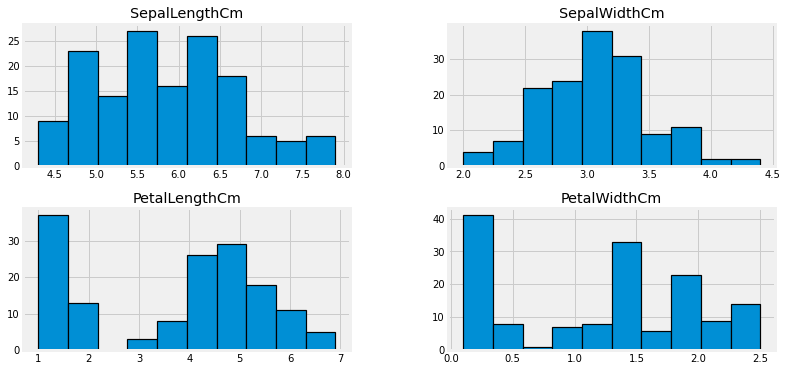

In [30]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

**13. Swarm plot**

- 친근한 벌떼가 벌집 주변에서 윙윙거리는 것처럼 보여서 Swarm Plot.

- Swarm Plot은 각 데이터 지점이 명확히 보이고 오버플롯으로 인해 데이터가 가려지지 않는다는 것.

- Swarm Plot은 데이터 포인트를 서로 최소 거리만큼 이동하여 중첩을 방지하는 무작위 지터 접근 방식을 개선.

- 결과는 아래 그림에 표시된 것처럼 각각의 고유한 데이터 점을 볼 수 있는 Plot.

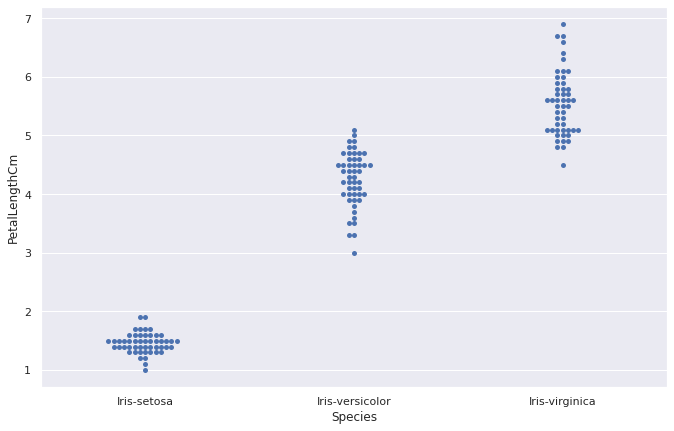

In [32]:
sns.set(style="darkgrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
fig = sns.swarmplot(x="Species", y="PetalLengthCm", data=iris)

**14. Box and Swarm plot combined**

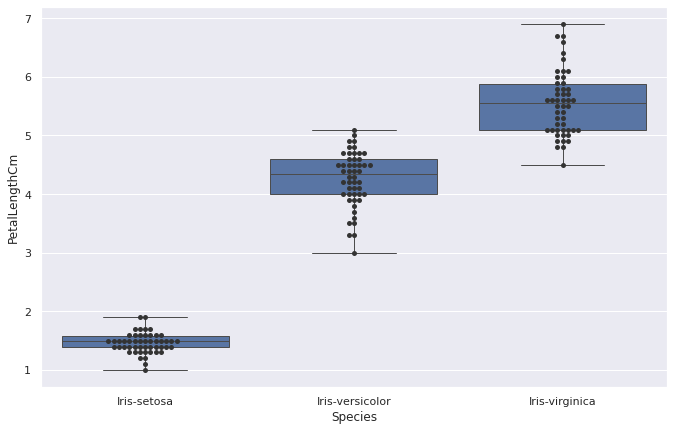

In [33]:
sns.set(style="darkgrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
fig= sns.boxplot(x="Species", y="PetalLengthCm", data=iris, whis=np.inf)
fig= sns.swarmplot(x="Species", y="PetalLengthCm", data=iris, color=".2")

**15. Swarm  and Violin plot combined**

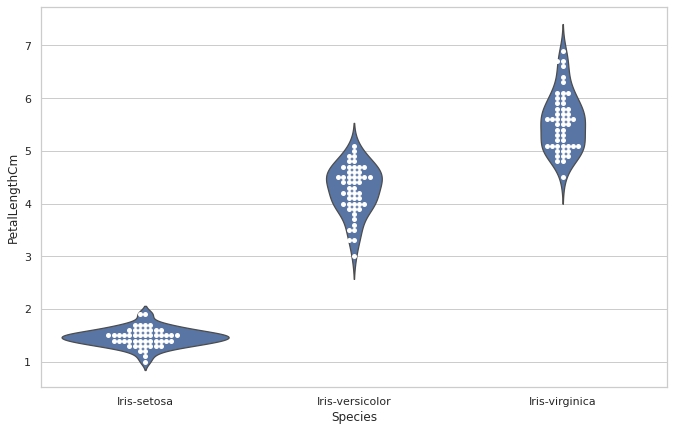

In [34]:
sns.set(style="whitegrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
ax = sns.violinplot(x="Species", y="PetalLengthCm", data=iris, inner=None)
ax = sns.swarmplot(x="Species", y="PetalLengthCm", data=iris,color="white", edgecolor="black")

**16. Species based classification**

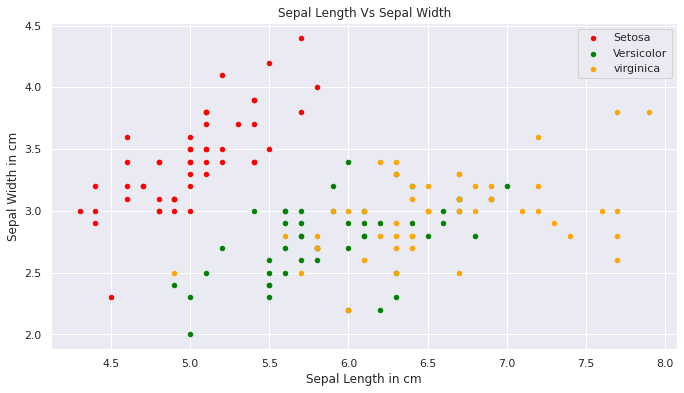

In [35]:
sns.set(style="darkgrid")
sc=iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red',label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green',label='Versicolor',ax=sc)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='virginica', ax=sc)
sc.set_xlabel('Sepal Length in cm')
sc.set_ylabel('Sepal Width in cm')
sc.set_title('Sepal Length Vs Sepal Width')
sc=plt.gcf()
sc.set_size_inches(10,6)

**17. LM PLot**

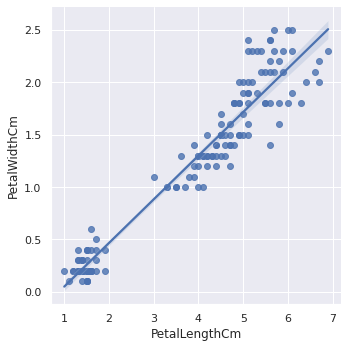

In [36]:
fig=sns.lmplot(x="PetalLengthCm", y="PetalWidthCm",data=iris)

**18. FacetGrid**

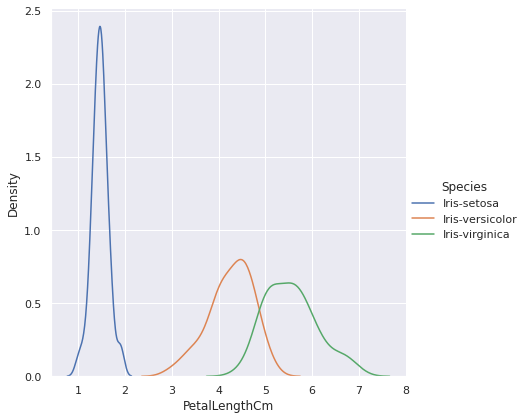

In [38]:
sns.FacetGrid(iris, hue="Species", height=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()
plt.ioff() 

**19. Andrews Curve:**

- 데이터 시각화에서 Andrews plot 또는 Andrews curve는 구조를 고차원 데이터로 시각화하는 방법. 
- 이는 기본적으로 Kent Kiviat 레이더 차트의 정수가 아닌 롤다운 버전 또는 평활화된 버전의 Parallel coordinate plot임.
- 판다스에서는 Andrews Curves를 사용하여 데이터 구조를 계획하고 시각화함.
- 각 다변량 관측치는 곡선으로 변환되며 Fourier 시리즈의 계수를 나타냄.
- 이는 시계열 데이터에서 특이치를 탐지하는 데 유용함.
- colormap를 사용하여 곡선의 색상을 변경함.

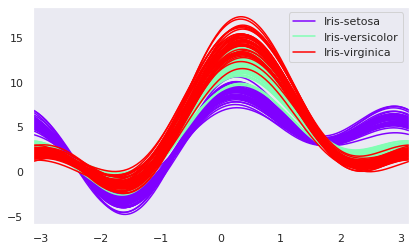

In [39]:
from pandas.plotting import andrews_curves

andrews_curves(iris,"Species",colormap='rainbow')
plt.show()
plt.ioff()

**20. Parallel coordinate plot:**

- 이러한 유형의 시각화는 다변량 수치 데이터를 플로팅하는 데 사용됨. 
- Parallel coordinate plot는 여러 변수를 서로 비교하여 이들 변수 간의 관계를 확인하는 데 이상적임.
- 예를 들어 속성이 동일한 일련의 제품(다른 모델의 시스템 또는 자동차 사양 비교)을 비교해야 하는 경우.

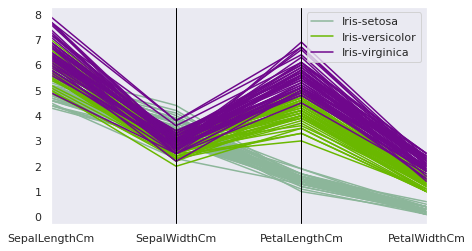

In [40]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris, "Species")
plt.ioff()

**21. Radviz Plot**

- RadViz는 원의 원주 둘레에 각 형상 치수를 균일하게 표시한 다음 점이 중심에서 각 호까지의 축에 값을 정규화하는 다변량 데이터 시각화 알고리즘.

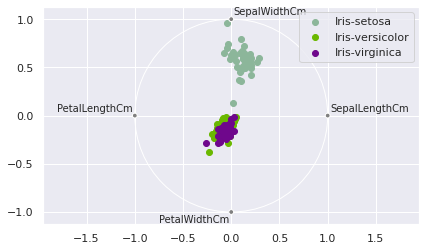

In [41]:
from pandas.plotting import radviz
radviz(iris, "Species")
plt.ioff()

**22. Factor Plot**

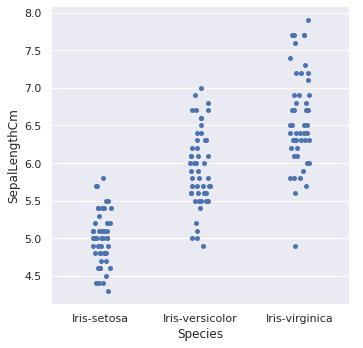

In [53]:
#f,ax=plt.subplots(1,2,figsize=(18,8))
sns.catplot(x='Species',y='SepalLengthCm',data=iris)
plt.ioff()
plt.show()

# ----------------
#sns.factorplot('Species','SepalLengthCm',data=iris,ax=ax[0][0])
#sns.factorplot('Species','SepalWidthCm',data=iris,ax=ax[0][1])
#sns.factorplot('Species','PetalLengthCm',data=iris,ax=ax[1][0])
#sns.factorplot('Species','PetalWidthCm',data=iris,ax=ax[1][1])

**23. Boxen Plot**

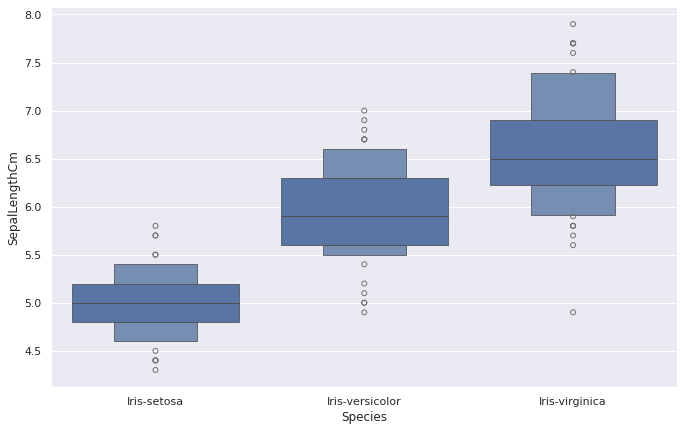

In [52]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxenplot(x='Species',y='SepalLengthCm',data=iris)

**24.Residual Plot :**

- 잔차를 표시하는 가장 유용한 방법은 예측된 값을 x축에 표시하고 잔차를 y축에 표시하는 것. 
- 0에서 선으로부터의 거리는 해당 값에 대한 예측이 얼마나 나쁜지 나타냄.

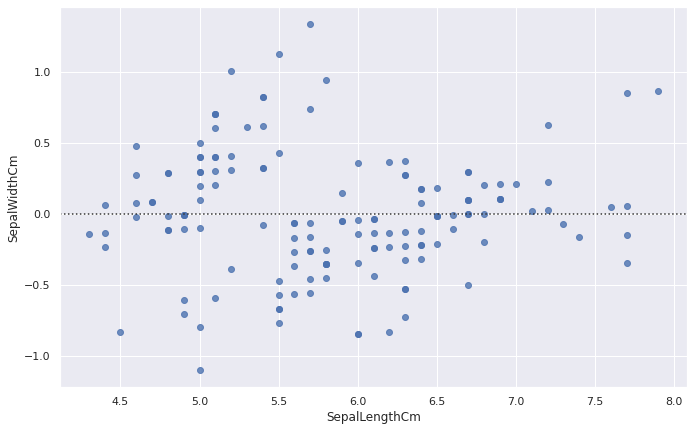

In [58]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.residplot(x='SepalLengthCm', y='SepalWidthCm',data=iris)

**25.Venn Diagram :**

- 벤 다이어그램(기본 다이어그램, 세트 다이어그램 또는 로직 다이어그램이라고도 함)은 서로 다른 세트의 유한 컬렉션 간에 가능한 모든 논리적 관계를 보여 주는 다이어그램. 
- 각 세트는 원으로 표시됨. 
- 원 크기는 그룹의 중요성을 나타냄. 
- 일반적으로 그룹이 겹침. 
- 겹치는 크기는 두 그룹 사이의 교차점을 나타냄.

In [59]:
!pip install matplotlib-venn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 KB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45301 sha256=65e7b9ad2deb03d537470246c1704e341c53768910ea5349c6fc411361a946af
  Stored in directory: /home/jynah119/.cache/pip/wheels/51/7e/04/79020d177ea85e21043f09b451e3a7d093f919ac874cadd4b2
Successfully built matplotlib-venn


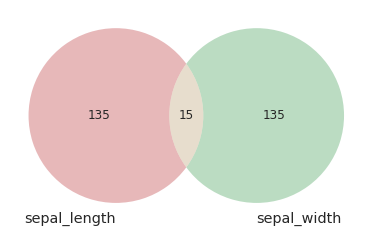

In [60]:
from matplotlib_venn import venn2

sepal_length = iris.iloc[:,0]
sepal_width = iris.iloc[:,1]
petal_length = iris.iloc[:,2]
petal_width = iris.iloc[:,3]
# First way to call the 2 group Venn diagram
venn2(subsets = (len(sepal_length)-15, len(sepal_width)-15, 15), set_labels = ('sepal_length', 'sepal_width'))
plt.show()

**26. Spider Graph**

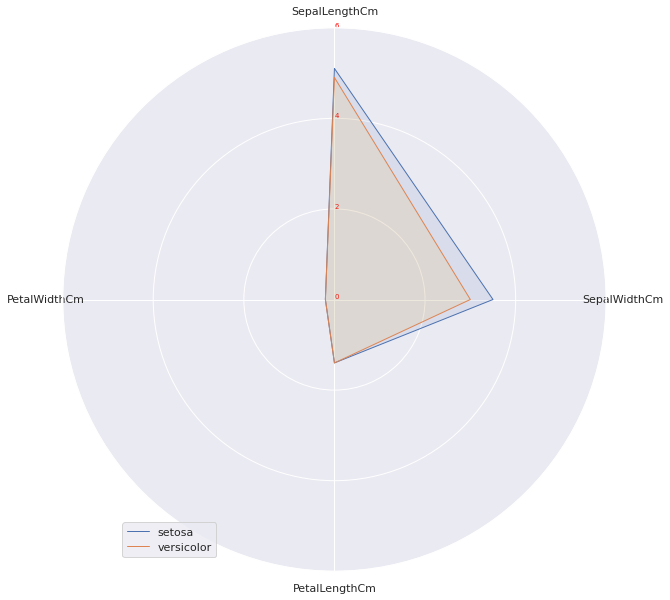

In [61]:
from math import pi
categories = list(iris)[:4]
N = len(categories)
angles = [ n / float(N)*2*pi for n in range(N)]
angles = angles + angles[:1]
plt.figure(figsize = (10,10))
ax = plt.subplot(111,polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],categories)
ax.set_rlabel_position(0)
plt.yticks([0,2,4,6],["0","2","4","6"],color= "red", size = 7)
plt.ylim(0,6)

values = iris.loc[0].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="setosa" )
ax.fill(angles,values,"b",alpha=0.1)

values = iris.loc[1].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="versicolor" )
ax.fill(angles,values,"orange",alpha=0.1)
plt.legend(loc = "upper left",bbox_to_anchor = (0.1,0.1))
plt.show()

**27.Donut plot**

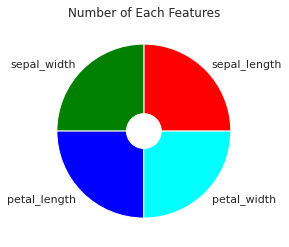

In [62]:
# donut plot
feature_names = "sepal_length","sepal_width","petal_length","petal_width"
feature_size = [len(sepal_length),len(sepal_width),len(petal_length),len(petal_width)]
# create a circle for the center of plot
circle = plt.Circle((0,0),0.2,color = "white")
plt.pie(feature_size, labels = feature_names, colors = ["red","green","blue","cyan"] )
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Number of Each Features")
plt.show()

**28.KDE Plot**

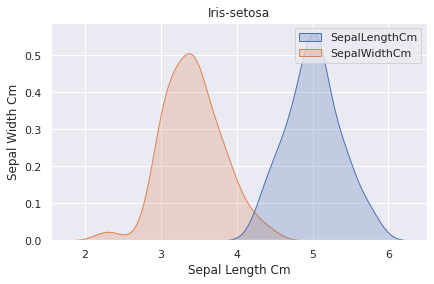

In [63]:
# KDE plot of sepal_length VS sepal width for setosa species of flower.
sub=iris[iris['Species']=='Iris-setosa']
sns.kdeplot(data=sub[['SepalLengthCm','SepalWidthCm']],color="plasma", shade=True, shade_lowest=False)
plt.title('Iris-setosa')
plt.xlabel('Sepal Length Cm')
plt.ylabel('Sepal Width Cm')
pass

#### 29.Cluster Map

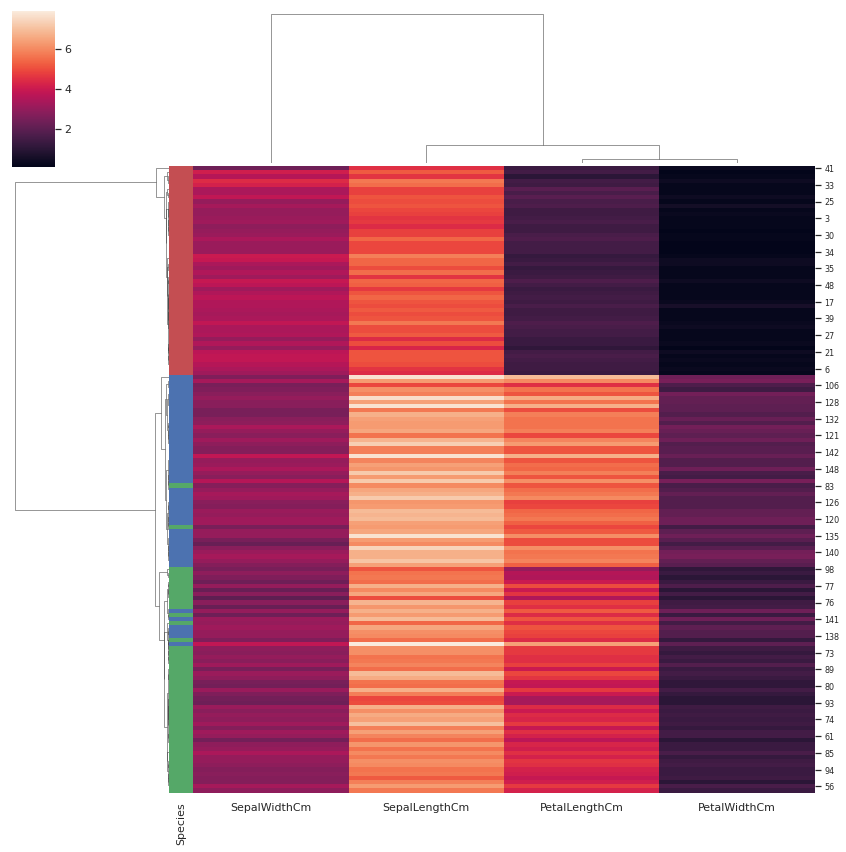

In [64]:
# cluster map (dendogram and tree)
df = iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
df1 = iris.Species
x = dict(zip(df1.unique(),"rgb"))
row_colors = df1.map(x)
cg = sns.clustermap(df,row_colors=row_colors,figsize=(12, 12),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0,size =8)
plt.show()

**30.Dashboard**

- 대시보드에서는 Python을 사용하여 대시보드에 폼을 만드는 여러 개의 플롯을 생성하는 방법을 보여 줌.
- 이 그림에서는 동일한 대시보드에 Seaborn 및 Mattplotlib 그림을 그리는 방법을 시연.

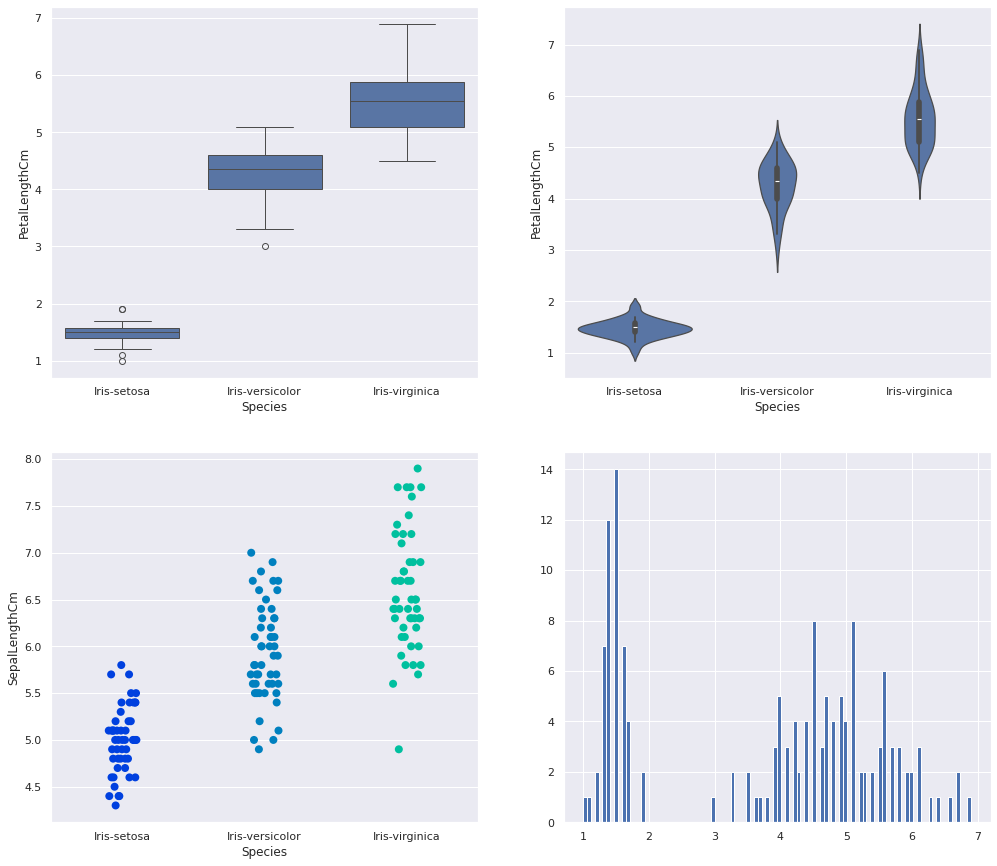

In [65]:
sns.set_style('darkgrid')
f,axes=plt.subplots(2,2,figsize=(15,15))

k1=sns.boxplot(x="Species", y="PetalLengthCm", data=iris,ax=axes[0,0])
k2=sns.violinplot(x='Species',y='PetalLengthCm',data=iris,ax=axes[0,1])
k3=sns.stripplot(x='Species',y='SepalLengthCm',data=iris,jitter=True,edgecolor='gray',size=8,palette='winter',orient='v',ax=axes[1,0])
#axes[1,1].hist(iris.hist,bin=10)
axes[1,1].hist(iris.PetalLengthCm,bins=100)
#k2.set(xlim=(-1,0.8))
plt.show()

**31.Stacked Histogram**

In [66]:
iris['Species'] = iris['Species'].astype('category')
#iris.head()

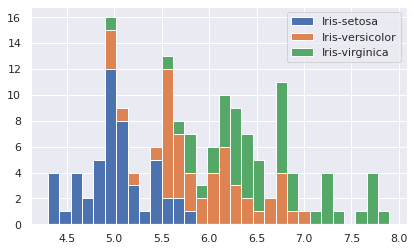

In [67]:
list1=list()
mylabels=list()
for gen in iris.Species.cat.categories:
    list1.append(iris[iris.Species==gen].SepalLengthCm)
    mylabels.append(gen)
    
h=plt.hist(list1,bins=30,stacked=True,rwidth=1,label=mylabels)
plt.legend()
plt.show()

- 누적 히스토그램에서는 다양한 종의 Sepal Length 분포를 함께 확인할 수 있음.
- 이것은 우리에게 세 가지 다른 종류의 Iris에 대한 Sepan 길이의 범위를 보여줌.

**32.Area Plot:**

- Area plot은 Iris의 다양한 치수와 그 범위를 데이터셋으로 시각적으로 보여줌.

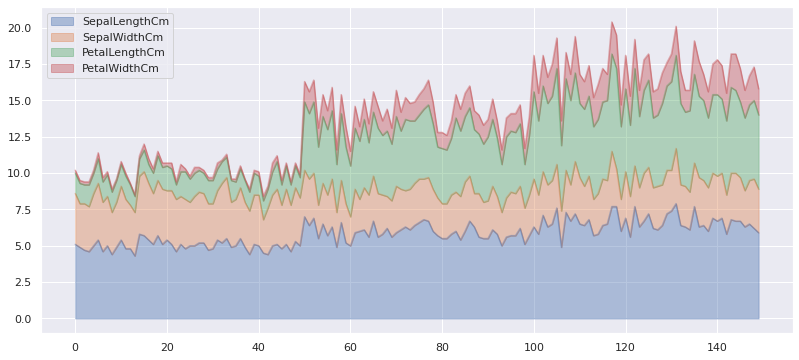

In [68]:
#iris['SepalLengthCm'] = iris['SepalLengthCm'].astype('category')
#iris.head()
#iris.plot.area(y='SepalLengthCm',alpha=0.4,figsize=(12, 6));
iris.plot.area(y=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],alpha=0.4,figsize=(12, 6));

**33.Distplot:**

- 단일 변수의 분포를 살펴보는 데 도움이 됨.

- KDE는 분포의 밀도를 나타냄.

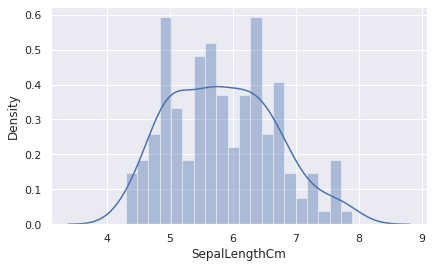

In [69]:
sns.distplot(iris['SepalLengthCm'],kde=True,bins=20);

**34.Cumulative Histogram**

In [70]:
setosa=iris[iris['Species']=='Iris-setosa']
versicolor=iris[iris['Species']=='Iris-versicolor']
virginica=iris[iris['Species']=='Iris-virginica']

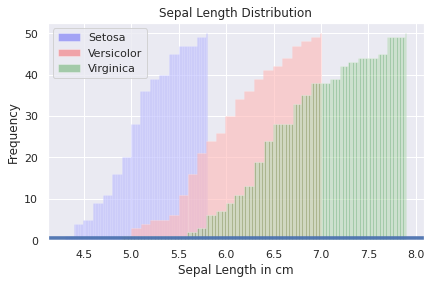

In [71]:
setosa['SepalLengthCm'].plot(kind='hist',bins=200,alpha=0.3,color='blue',cumulative=True)
versicolor['SepalLengthCm'].plot(kind='hist',bins=200,alpha=0.3,color='red',cumulative=True)
virginica['SepalLengthCm'].plot(kind='hist',bins=200,alpha=0.3,color='green',cumulative=True)

plt.title('Sepal Length Distribution')
plt.legend(['Setosa','Versicolor','Virginica'])
plt.xlabel('Sepal Length in cm')

plt.axhline(0.8)
plt.axhline(0.5)
plt.axhline(0.2);
#range=(50,80)

- Sepal Length의 누적분포와 겹치는 지역도 볼 수 있음.